# Learn Simple Linear Regression (SLR)

In this notebook, 
- we will learn the basics of `Regression` algorithm. 
- take a sample dataset, perform `EDA`(Exploratory Data Analysis) and implement SLR(Simple Linear Regression) models using `statsmodels.api`, `statsmodels.formula.api`, `scikit-learn` libraries in Python.

# What is Regression Algorithm?

### Regression is an `supervised machine learning` algorithm used to predict continuous features. 
#### Linear regression is the simplest regression algorithm that attempts to model the relationship between dependent variable and one or more independent variables by fitting a linear equation/best fit line to observed data.

Based on the number of input features, Linear regression could be of two types:
- Simple Linear Regression (SLR)
- Multiple Linear Regression (MLR)

In Simple Linear Regression (SLR), we will have a single input variable based on which we predict the output variable.
Where in Multiple Linear Regression (MLR), we predict the output based on multiple inputs.

Input variables can also be termed as Independent/predictor variables, and the Output variables are called dependent variables.

The equation for SLR is `Y=βo + β1X + ϵ`,
where, Y is the dependent variable, X is the predictor, βo, β1 are coefficients/parameters of the model, and Epsilon(ϵ) is a random variable called Error Term.

Gradient descent is an optimization technique used to tune the coefficient and bias of a linear equation.

**Let's begin by taking a small problem statement..**

Problem statement: Build a simple linear regression model to predict the Salary Hike using Years of Experience.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

**Importing necessary libraries**

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import probplot
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Use `pandas` library to import our csv file and create a dataframe

In [4]:
df = pd.read_csv("Salary_Data.csv")

In [5]:
# View data
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Perform EDA (Exploratory Data Analysis)

The basic steps of EDA are:
- Understand the dataset
    - Identifying the number of features or columns
    - Identifying the features or columns
    - Identify the size of the dataset
    - Identifying the data types of features
    - Checking if the dataset has empty cells 
    - Identifying the number of empty cells by features or columns
- Handling Missing values and Outliers
- Encoding Categorical variables
- Graphical Univariate Analysis, Bivariate
- Normalization and Scaling

**Understanding the dataset**  

Identifying the number of features or columns using `DataFrame.columns`

In [6]:
len(df.columns) # We have two columns in our dataset

2

Identifying the features or columns using `DataFrame.columns`

In [7]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [8]:
#  We can get the size of the dataset using DataFrame.shape
df.shape

(30, 2)

Identifying the data types of features using `DataFrame.dtypes`

In [9]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

Checking if the dataset has empty cells using `DataFrame.isnull().values.any()`. 

DataFrame.isnull() returns a mask of bool values for each element in DataFrame that indicates whether an element is an NA value. So we can just use values.any().

In [10]:
print(df.isnull().values.any())

False


Identifying the number of empty cells by features or columns using `DataFrame.isnull()` .sum() returns the number of null values for each column.

In [11]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

`DataFrame.info` can be used to see the datatypes, and non-null values count.

In [12]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


`DataFrame.describe` provides Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values

In [13]:


df.describe() 

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


We do not have any missing/null values that has to be treated.

**Graphical Univariate analysis**

Few examples are Histogram, density plot, boxplot, and Normal Q-Q plot.

They help us understand the distribution of the data points, presence of outliers.

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

Text(0.5, 1.0, "Q-Q plot of 'Salary'")

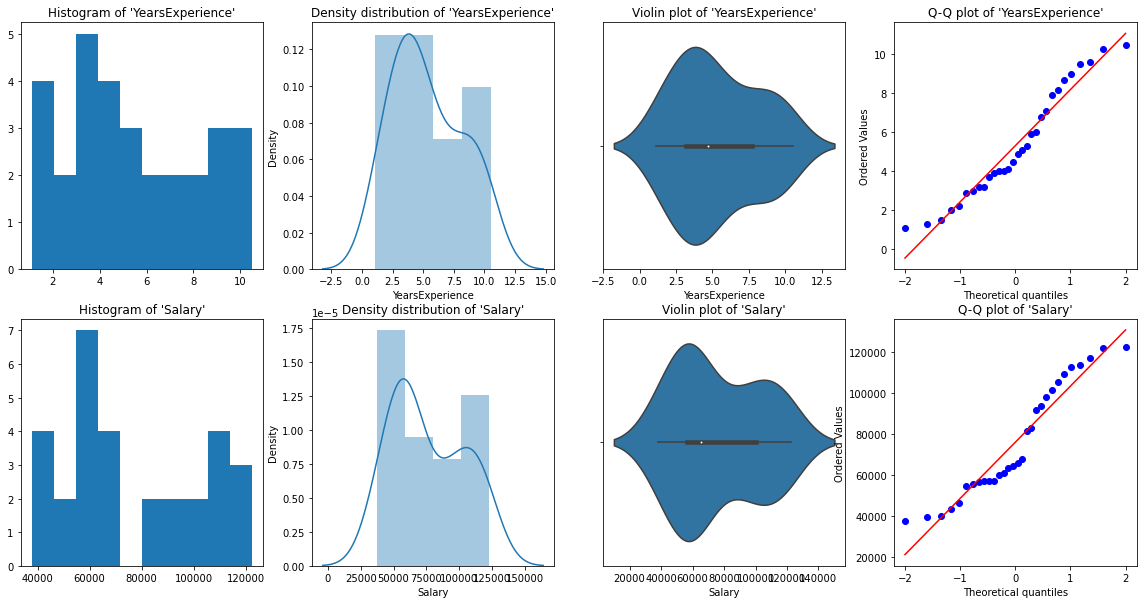

In [14]:
# Histogram
# We can use either plt.hist or sns.histplot
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.hist(df['YearsExperience'], density=False)
plt.title("Histogram of 'YearsExperience'")
plt.subplot(2,4,5)
plt.hist(df['Salary'], density=False)
plt.title("Histogram of 'Salary'")

# Density plot
plt.subplot(2,4,2)
sns.distplot(df['YearsExperience'], kde=True)
plt.title("Density distribution of 'YearsExperience'")
plt.subplot(2,4,6)
sns.distplot(df['Salary'], kde=True)
plt.title("Density distribution of 'Salary'")

# boxplot or violin plot
# A violin plot is a method of plotting numeric data. It is similar to a box plot, 
# with the addition of a rotated kernel density plot on each side
plt.subplot(2,4,3)
# plt.boxplot(df['YearsExperience'])
sns.violinplot(df['YearsExperience'])
# plt.title("Boxlpot of 'YearsExperience'")
plt.title("Violin plot of 'YearsExperience'")
plt.subplot(2,4,7)
# plt.boxplot(df['Salary'])
sns.violinplot(df['Salary'])
# plt.title("Boxlpot of 'Salary'")
plt.title("Violin plot of 'Salary'")

# Normal Q-Q plot
plt.subplot(2,4,4)
probplot(df['YearsExperience'], plot=plt)
plt.title("Q-Q plot of 'YearsExperience'")
plt.subplot(2,4,8)
probplot(df['Salary'], plot=plt)
plt.title("Q-Q plot of 'Salary'")

From the above graphical representations, `YearsExperience looks like normally distributed, and Salary doesn't look normal`.
We can verify this using `Shapiro Test`.

In [15]:
# Def a function to run Shapiro test

# Defining our Null, Alternate Hypothesis
Ho = 'Data is Normal'
Ha = 'Data is not Normal'

# Defining a significance value
alpha = 0.05
def normality_check(df):
    for columnName, columnData in df.iteritems():
        print("Shapiro test for {columnName}".format(columnName=columnName))
        res = stats.shapiro(columnData)
#         print(res)
        pValue = round(res[1], 2)
        
        # Writing condition
        if pValue > alpha:
            print("pvalue = {pValue} > {alpha}. We fail to reject Null Hypothesis. {Ho}".format(pValue=pValue, alpha=alpha, Ho=Ho))
        else:
            print("pvalue = {pValue} <= {alpha}. We reject Null Hypothesis. {Ha}".format(pValue=pValue, alpha=alpha, Ha=Ha))
        
        
# Drive code
normality_check(df)

Shapiro test for YearsExperience
pvalue = 0.1 > 0.05. We fail to reject Null Hypothesis. Data is Normal
Shapiro test for Salary
pvalue = 0.02 <= 0.05. We reject Null Hypothesis. Data is not Normal


Our instinct from the graphs was correct. YearsExperience is normally distributed, and Salary isn't normally distributed.

**Bivariate visualization**

for Numerical vs. Numerical data, we can plot the below graphs
1. Scatterplot
2. Line plot
3. Heatmap for correlation
4. Joint plot

Text(0.5, 1.0, 'Line Plot')

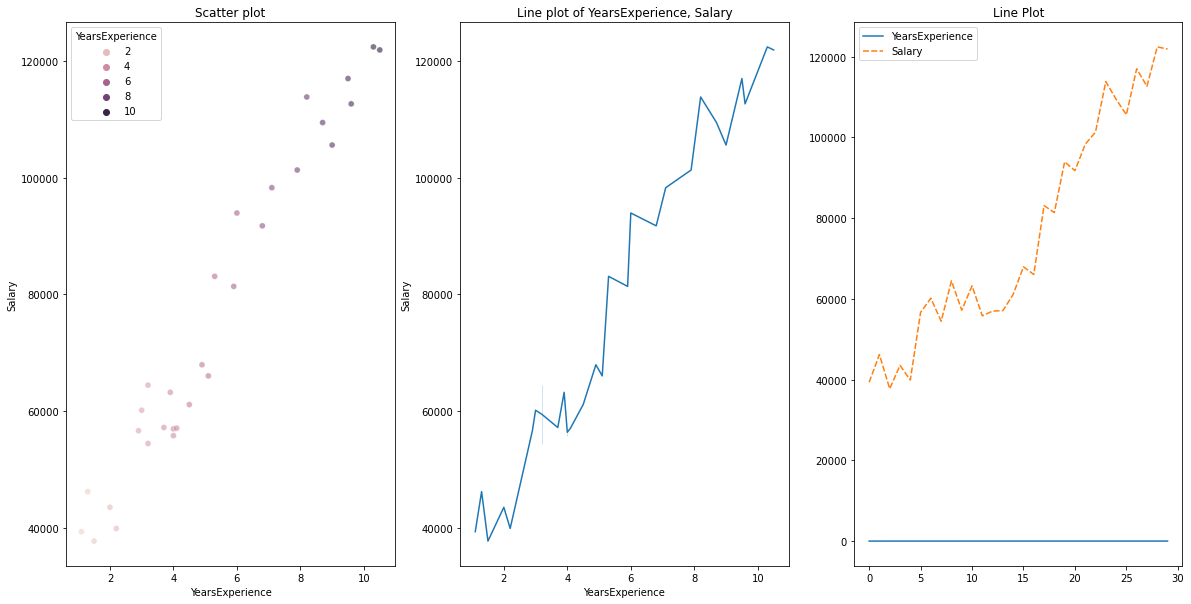

In [16]:
# Scatterplot & Line plots
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.scatterplot(data=df, x="YearsExperience", y="Salary", hue="YearsExperience", alpha=0.6)
plt.title("Scatter plot")
plt.subplot(1,3,2)
sns.lineplot(data=df, x="YearsExperience", y="Salary")
plt.title("Line plot of YearsExperience, Salary")
plt.subplot(1,3,3)
sns.lineplot(data=df)
plt.title('Line Plot')

Text(0.5, 1.0, 'Heatmap using matplotlib')

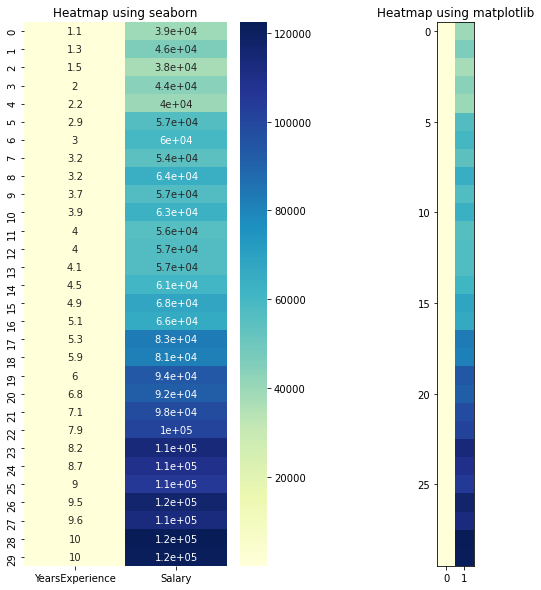

In [17]:
# heatmap
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
sns.heatmap(data=df, cmap="YlGnBu", annot = True)
plt.title("Heatmap using seaborn")
plt.subplot(1, 2, 2)
plt.imshow(df, cmap ="YlGnBu")
plt.title("Heatmap using matplotlib")

Text(0.5, 1.0, 'Joint plot using sns')

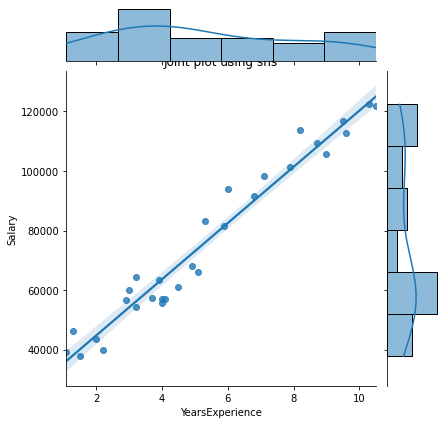

In [18]:
# Joint plot
sns.jointplot(x = "YearsExperience", y = "Salary", kind = "reg", data = df)
plt.title("Joint plot using sns")
# kind can be hex, kde, scatter, reg, hist. When kind='reg' it shows the best fit line.

Check if there is any correlation between the variables

Correlation: 
                  YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


<AxesSubplot:>

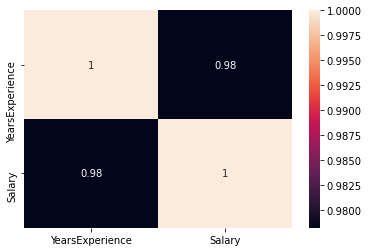

In [19]:
print("Correlation: "+ '\n', df.corr()) # 0.978 which is high positive correlation
# Draw a heatmap for correlation matrix
plt.subplot(1,1,1)
sns.heatmap(df.corr(), annot=True)

**Normalization**

As we can see, there is a huge difference between the values of YearsExperience, Salary columns. We can use `Normalization` to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

We use `sklearn.preprocessing.Normalizer` to normalize our data. It returns values between 0 and 1.

In [20]:
# Create new columns for the normalized values
df['Norm_YearsExp'] = preprocessing.normalize(df[['YearsExperience']], axis=0)
df['Norm_Salary'] = preprocessing.normalize(df[['Salary']], axis=0)
df.head()

,YearsExperience,Salary,Norm_YearsExp,Norm_Salary
0,1.1,39343.0,0.033464,0.089074
1,1.3,46205.0,0.039549,0.104610
2,1.5,37731.0,0.045633,0.085424
3,2.0,43525.0,0.060844,0.098542
4,2.2,39891.0,0.066928,0.090315


### Linear Regression using scikit-learn

`LinearRegression()`: LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [21]:
def regression(df):
#     defining the independent and dependent features
    x = df.iloc[:, 1:2]
    y = df.iloc[:, 0:1] 
    # print(x,y)

    # Instantiating the LinearRegression object
    regressor = LinearRegression()
    
    # Training the model
    regressor.fit(x,y)

    # Checking the coefficients for the prediction of each of the predictor
    print('\n'+"Coeff of the predictor: ",regressor.coef_)
    
    # Checking the intercept
    print("Intercept: ",regressor.intercept_)

    # Predicting the output
    y_pred = regressor.predict(x)
#     print(y_pred)

    # Checking the MSE
    print("Mean squared error(MSE): %.2f" % mean_squared_error(y, y_pred))
    # Checking the R2 value
    print("Coefficient of determination: %.3f" % r2_score(y, y_pred)) # Evaluates the performance of the model # says much percentage of data points are falling on the best fit line
    
# Driver code
regression(df[['Salary', 'YearsExperience']]) # 0.957 accuracy
regression(df[['Norm_Salary', 'Norm_YearsExp']]) # 0.957 accuracy


Coeff of the predictor:  [[9449.96232146]]
Intercept:  [25792.20019867]
Mean squared error(MSE): 31270951.72
Coefficient of determination: 0.957

Coeff of the predictor:  [[0.70327706]]
Intercept:  [0.05839456]
Mean squared error(MSE): 0.00
Coefficient of determination: 0.957


### Linear Regression using statsmodel.formula.api (smf) 

The predictors in the statsmodel formula api must be enumerated individually. And in this method, a constant is automatically added to the data.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.14e-20
Time:                        13:51:55   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.0

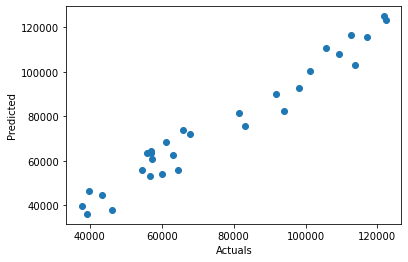

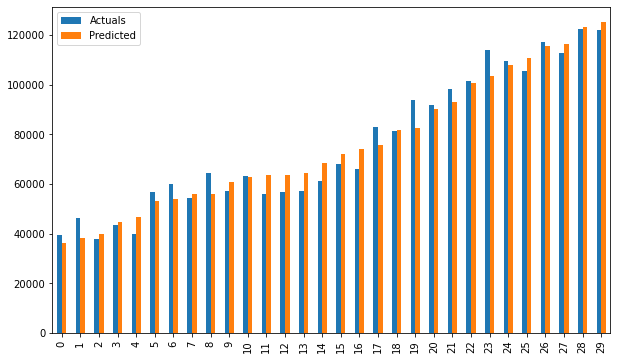

In [28]:
def smf_ols(df):
    # defining the independent and dependent features
    x = df.iloc[:, 1:2]
    y = df.iloc[:, 0:1] 
#     print(x)
    # train the model
    model = smf.ols('y~x', data=df).fit()
    # print model summary
    print(model.summary())
    
    # Predict y
    y_pred = model.predict(x)
#     print(type(y), type(y_pred))
#     print(y, y_pred)

    y_lst = y.Salary.values.tolist()
#     y_lst = y.iloc[:, -1:].values.tolist()
    y_pred_lst = y_pred.tolist()
    
#     print(y_lst)
        
    data = [y_lst, y_pred_lst]
#     print(data)
    res = pd.DataFrame({'Actuals':data[0], 'Predicted':data[1]})
#     print(res)
    
    plt.scatter(x=res['Actuals'], y=res['Predicted'])
    plt.ylabel('Predicted')
    plt.xlabel('Actuals')
    
    res.plot(kind='bar',figsize=(10,6))

# Driver code
smf_ols(df[['Salary', 'YearsExperience']]) # 0.957 accuracy
# smf_ols(df[['Norm_Salary', 'Norm_YearsExp']]) # 0.957 accuracy

### Regression using statsmodels

The predictors are no longer have to be enumerated individually.

**statsmodels.regression.linear_model.OLS(endog, exog)**

- `endog` is the dependent variable
- `exog` is the independent variable. An intercept is not included by default and should be added by the user(using add_constant).

In [26]:
# Create a helper function
def OLS_model(df):
    # defining the independent and dependent features
    x = df.iloc[:, 1:2]
    y = df.iloc[:, 0:1] 
    # Add a constant term to the predictor
    x = sm.add_constant(x)
#     print(x)
    model = sm.OLS(y, x)
    # Train the model
    results = model.fit()
    # print('\n'+"Confidence interval:"+'\n', results.conf_int(alpha=0.05, cols=None)) #Returns the confidence interval of the fitted parameters. The default alpha=0.05 returns a 95% confidence interval.
    print('\n'"Model parameters:"+'\n',results.params)
    # print the overall summary of the model result
    print(results.summary())
    
    
# Driver code
OLS_model(df[['Salary', 'YearsExperience']]) # 0.957 accuracy
OLS_model(df[['Norm_Salary', 'Norm_YearsExp']]) # 0.957 accuracy


Model parameters:
 const              25792.200199
YearsExperience     9449.962321
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 14 May 2021   Prob (F-statistic):           1.14e-20
Time:                        13:42:57   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [27]:
# Execute this to save new versions of the notebook
jovian.commit(project="salary-data-slr.ipynb")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Creating a new project "harikabonthu96/salary-data-slr.ipynb"
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/harikabonthu96/salary-data-slr-5f4e9


'https://jovian.ai/harikabonthu96/salary-data-slr-5f4e9'